## Libraries

In [1]:
library(haven)
library(dplyr)
library(sf)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.7.1, GDAL 2.2.3, PROJ 4.9.3



## Dwelling data

In [2]:
dwelling2018 <- read_dta('../../data/raw/ENAHO/enaho01-2018-100.dta')
dwelling2017 <- read_dta('../../data/raw/ENAHO/enaho01-2017-100.dta')
dwelling2016 <- read_dta('../../data/raw/ENAHO/enaho01-2016-100.dta')
dwelling2015 <- read_dta('../../data/raw/ENAHO/enaho01-2015-100.dta')
dwelling2014 <- read_dta('../../data/raw/ENAHO/enaho01-2014-100.dta')

In [3]:
dwelling2018 <- select(dwelling2018, c(aÑo, conglome, vivienda, hogar, latitud, longitud, dominio))
dwelling2017 <- select(dwelling2017, c(aÑo, conglome, vivienda, hogar, latitud, longitud, dominio))
dwelling2016 <- select(dwelling2016, c(aÑo, conglome, vivienda, hogar, latitud, longitud, dominio))
dwelling2015 <- select(dwelling2015, c(aÑo, conglome, vivienda, hogar, latitud, longitud, dominio))
dwelling2014 <- select(dwelling2014, c(aÑo, conglome, vivienda, hogar, latitud, longitud, dominio))

In [4]:
dwelling <- rbind(dwelling2018,
                  dwelling2017,
                  dwelling2016,
                  dwelling2015,
                  dwelling2014)

In [5]:
dwelling <- filter(dwelling, dominio==8)

In [6]:
dwelling <- rename(dwelling, ano = aÑo)

## Summary data

In [7]:
summary2018 <- read_dta('../../data/raw/ENAHO/sumaria-2018.dta')
summary2017 <- read_dta('../../data/raw/ENAHO/sumaria-2017.dta')
summary2016 <- read_dta('../../data/raw/ENAHO/sumaria-2016.dta')
summary2015 <- read_dta('../../data/raw/ENAHO/sumaria-2015.dta')
summary2014 <- read_dta('../../data/raw/ENAHO/sumaria-2014.dta')

In [8]:
summary2018 <- select(summary2018, c(aÑo, conglome, vivienda, hogar, mieperho, pobreza, factor07, dominio, ubigeo))
summary2017 <- select(summary2017, c(aÑo, conglome, vivienda, hogar, mieperho, pobreza, factor07, dominio, ubigeo))
summary2016 <- select(summary2016, c(aÑo, conglome, vivienda, hogar, mieperho, pobreza, factor07, dominio, ubigeo))
summary2015 <- select(summary2015, c(aÑo, conglome, vivienda, hogar, mieperho, pobreza, factor07, dominio, ubigeo))
summary2014 <- select(summary2014, c(aÑo, conglome, vivienda, hogar, mieperho, pobreza, factor07, dominio, ubigeo))

In [9]:
summary <- rbind(summary2018,
                 summary2017,
                 summary2016,
                 summary2015,
                 summary2014)

In [10]:
summary <- filter(summary, dominio==8)

In [11]:
summary <- rename(summary, ano = aÑo)

In [12]:
df <- inner_join(summary, dwelling, by = c('ano', 'conglome', 'vivienda', 'hogar', 'dominio'))

Converting to `sf` object:

In [13]:
projcrs <- "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"
df <- st_as_sf(x = df,
               coords = c("longitud", "latitud"),
               crs = projcrs)

In [14]:
df <- st_transform(df, 3857)

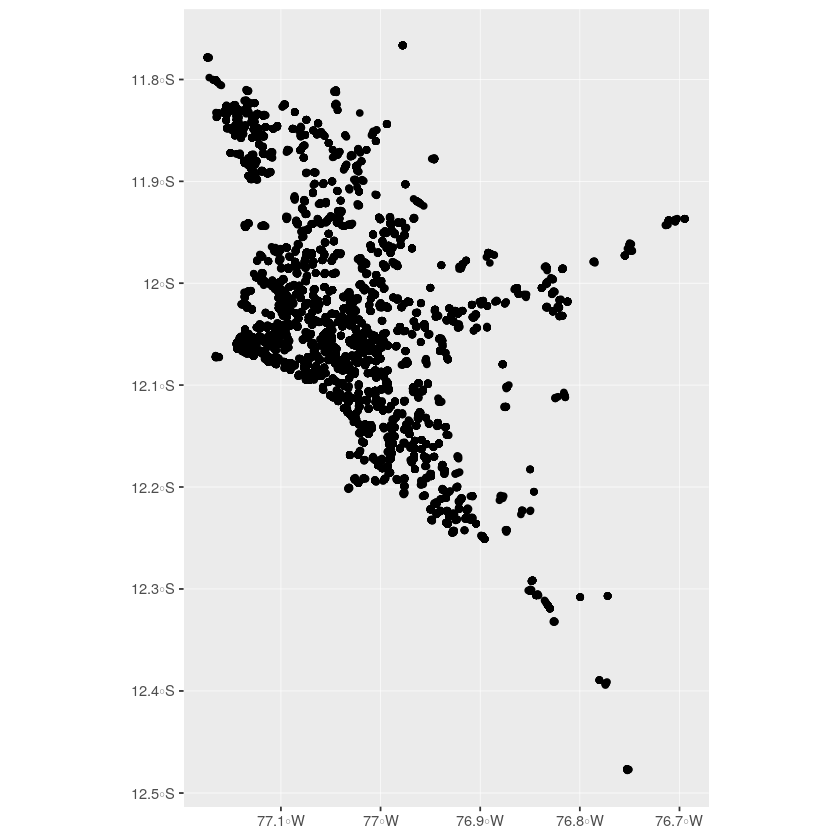

In [15]:
ggplot() +
  geom_sf(data = df)

## GIS zones data

Notice that this refers to the zones defined by the National Institute of Statistics of Peru, not to the zones I created in a different notebook.

In [16]:
zones <- st_read('../../data/raw/GIS/INEI zones/zonas_lima_metropolitana.shp')

Reading layer `zonas_lima_metropolitana' from data source `/home/luis_eduardo/cs_courses/data-vis-public-policy-course/data/raw/GIS/INEI zones/zonas_lima_metropolitana.shp' using driver `ESRI Shapefile'
Simple feature collection with 1655 features and 15 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -8593487 ymin: -1402618 xmax: -8534755 ymax: -1314688
epsg (SRID):    3857
proj4string:    +proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs


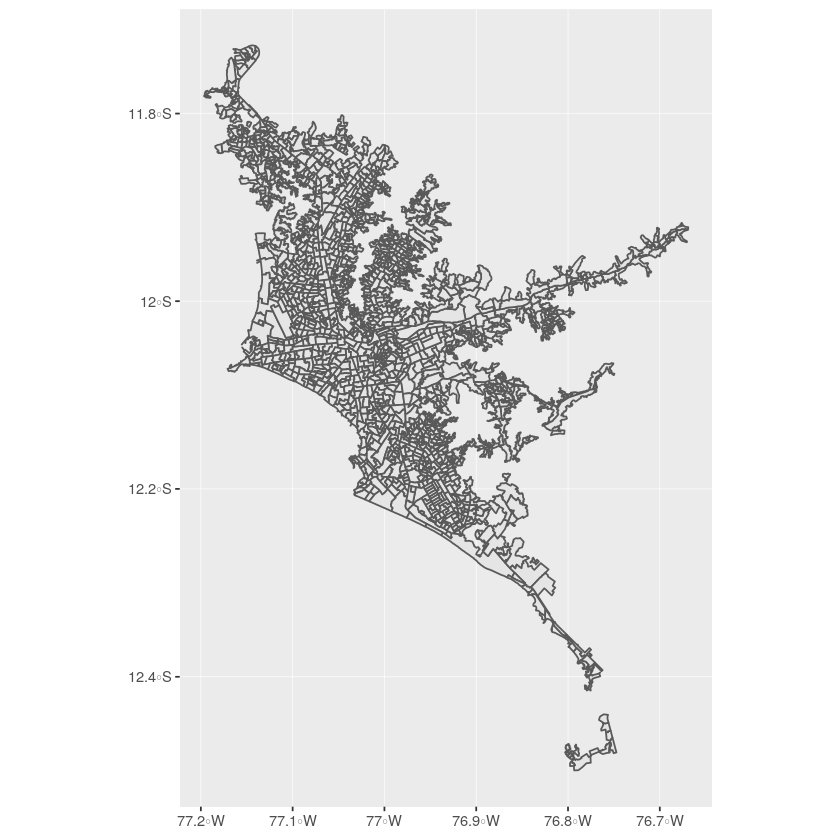

In [17]:
ggplot() +
  geom_sf(data = zones)

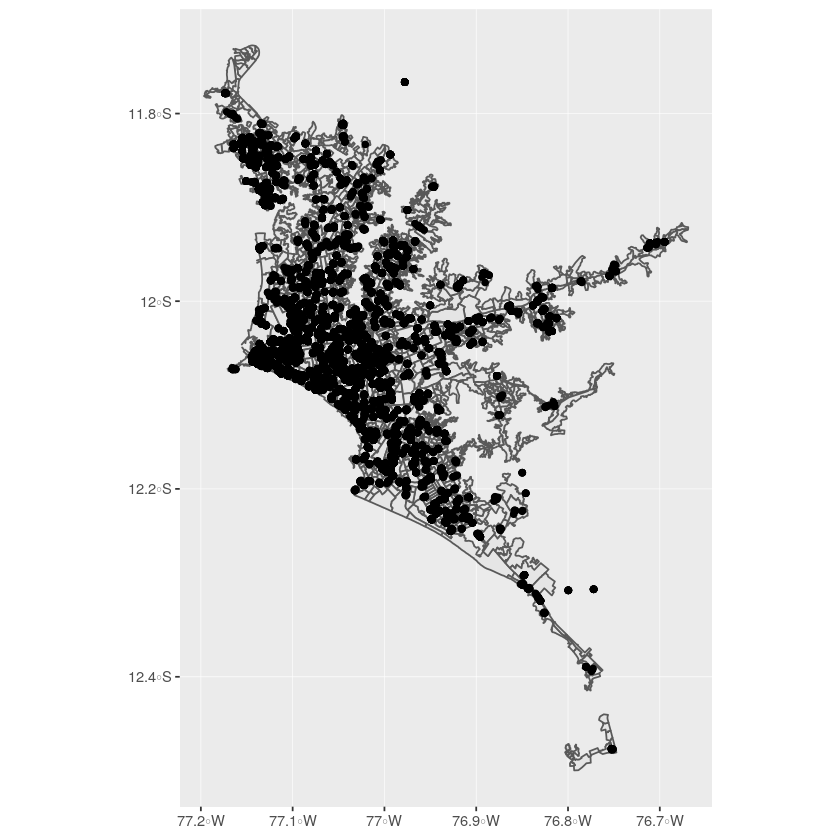

In [18]:
ggplot() +
  geom_sf(data = zones) +
  geom_sf(data = df)

Checking the zone where a household is:

In [19]:
intersects <- st_intersects(df, zones)

In [20]:
zones$IDZONA <- as.character(zones$IDZONA)

In [21]:
df$zone_id = NaN
for (i in seq(length(intersects))) {
    value <- unlist(intersects[i])
    if (length(value) > 0) {
        df$zone_id[i] <- zones$IDZONA[value]
    }
}

Now I'll try plotting some zones to check if the households from `df` also show up:

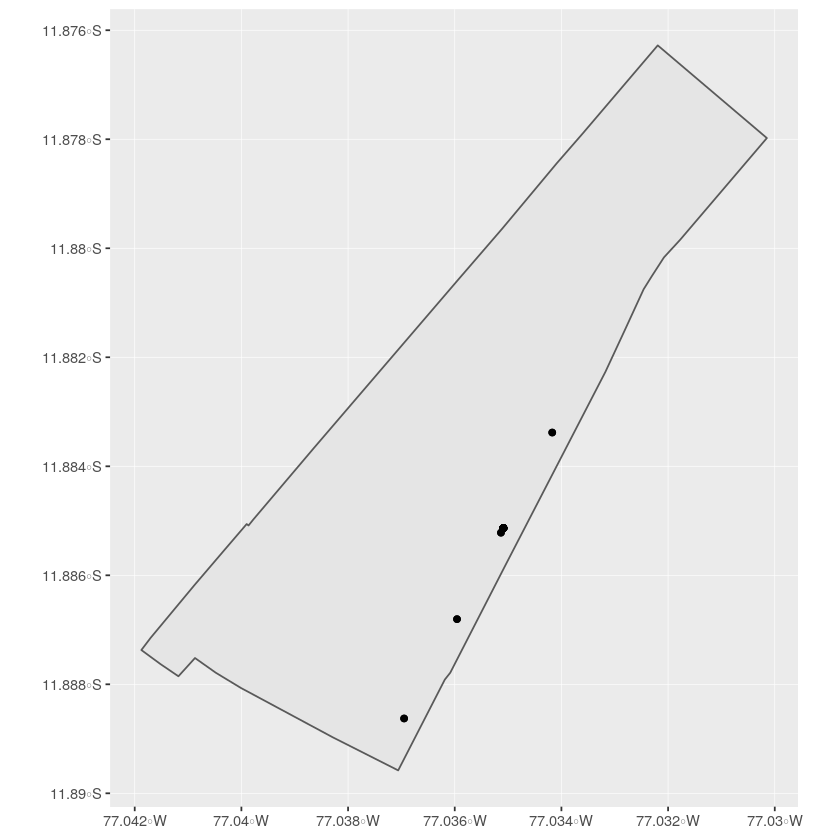

In [22]:
zone <- zones$IDZONA[432]
ggplot() +
    geom_sf(data = zones[zones$IDZONA == zone, ]) +
    geom_sf(data = df[df$zone_id == zone, ])

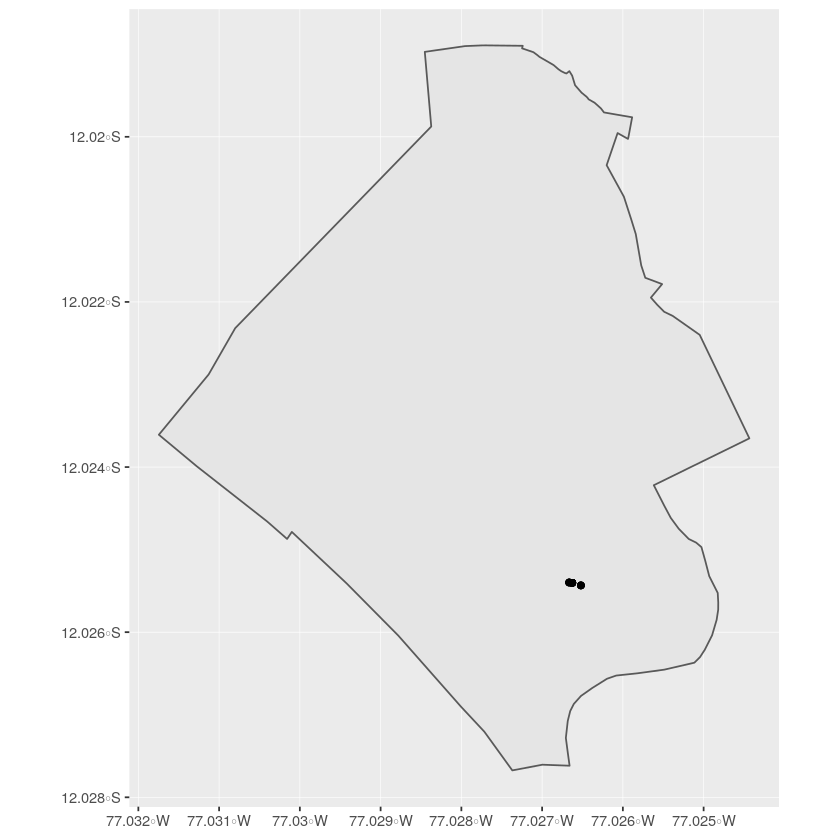

In [23]:
zone <- zones$IDZONA[999]
ggplot() +
    geom_sf(data = zones[zones$IDZONA == zone, ]) +
    geom_sf(data = df[df$zone_id == zone, ])

In [24]:
head(df)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

ano,conglome,vivienda,hogar,mieperho,pobreza,factor07,dominio,ubigeo,geometry,zone_id
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<chr>,<POINT [m]>,<chr>
2018,006026,016,11,6,2,240.1166,8,070106,POINT (-8586517 -1326091),07010600600
2018,006026,043,11,3,3,240.1166,8,070106,POINT (-8586517 -1326091),07010600600
2018,006026,070,11,3,3,240.1166,8,070106,POINT (-8586517 -1326091),07010600600
2018,006026,084,11,4,3,240.1166,8,070106,POINT (-8586517 -1326091),07010600600
2018,006026,110,11,3,3,240.1166,8,070106,POINT (-8586517 -1326091),07010600600
2018,006032,010,11,4,3,240.1166,8,070106,POINT (-8585958 -1327096),07010601400
